In [85]:
import pandas as pd


In [86]:
# import all the libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
!pip install requests

In [87]:
!pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")

print("Path to dataset files:", path)

Path to dataset files: /Users/sergio/.cache/kagglehub/datasets/nelgiriyewithana/new-york-housing-market/versions/1


In [88]:
import kagglehub
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")
print("Path to dataset files:", path)

Path to dataset files: /Users/sergio/.cache/kagglehub/datasets/nelgiriyewithana/new-york-housing-market/versions/1


In [89]:
import os

print(os.listdir(path))


['NY-House-Dataset.csv']


In [90]:
import pandas as pd

df = pd.read_csv(f"{path}/NY-House-Dataset.csv")

print(df.shape)
df.head()

(4801, 17)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [91]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [92]:
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("NYC_APP_TOKEN")
print("API Key loaded:", bool(api_key))

API Key loaded: True


In [93]:
from dotenv import load_dotenv
import os

load_dotenv(override=True)
print(os.getenv("NYC_APP_TOKEN"))

uTYGcrAsn2kjf6OMlnWPhU3aW


In [ ]:
import requests
import pandas as pd
import json
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("NYC_APP_TOKEN")

url = "https://data.cityofnewyork.us/api/v3/views/p5f6-bkga/query.json"


headers = { "Content-Type": "application/json",
    "X-App-Token": api_key
}

# Request body (v3 uses POST and JSON payload)
body = {
    "query": "SELECT *",     # can add WHERE filters later
    "page": {
        "pageNumber": 1,
        "pageSize": 5000      # first 5000 rows for testing
    },
    "includeSynthetic": False
}


response = requests.post(url, headers=headers, data=json.dumps(body))


✅ Data retrieved successfully!


In [95]:
# Convert directly to a DataFrame
noise_df = pd.DataFrame(data)

print(noise_df.shape)
noise_df.head()


(5000, 32)


,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,y_coordinate_state_plane,park_facility_name,park_borough,latitude,longitude,location,closed_date,resolution_description,vehicle_type,facility_type
0,66562462,2025-10-22T01:35:32.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11368,41-09 103 STREET,103 STREET,...,212055,Unspecified,QUEENS,40.7486368794296,-73.86283305951424,"{'type': 'Point', 'coordinates': [-73.86283305...",NaN,NaN,NaN,NaN
1,66566961,2025-10-22T01:35:31.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10040,27 SICKLES STREET,SICKLES STREET,...,253063,Unspecified,MANHATTAN,40.86125155997211,-73.92770691106014,"{'type': 'Point', 'coordinates': [-73.92770691...",NaN,NaN,NaN,NaN
2,66567012,2025-10-22T01:35:27.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11420,127 STREET,127 STREET,...,183086,Unspecified,QUEENS,40.66905293972673,-73.81263427560025,"{'type': 'Point', 'coordinates': [-73.81263427...",NaN,NaN,NaN,NaN
3,66560984,2025-10-22T01:34:51.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11368,100-01 41 AVENUE,41 AVENUE,...,211894,Unspecified,QUEENS,40.74819702122622,-73.86456270756402,"{'type': 'Point', 'coordinates': [-73.86456270...",NaN,NaN,NaN,NaN
4,66557862,2025-10-22T01:34:45.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10031,3473 BROADWAY,BROADWAY,...,239586,Unspecified,MANHATTAN,40.824273809736596,-73.95203493576481,"{'type': 'Point', 'coordinates': [-73.95203493...",NaN,NaN,NaN,NaN


In [96]:
noise_df.columns

Index(['unique_key', 'created_date', 'agency', 'agency_name', 'complaint_type',
       'descriptor', 'location_type', 'incident_zip', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'city', 'landmark', 'status', 'resolution_action_updated_date',
       'community_board', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'park_facility_name', 'park_borough',
       'latitude', 'longitude', 'location', 'closed_date',
       'resolution_description', 'vehicle_type', 'facility_type'],
      dtype='object')

In [97]:
cols_to_keep = [
    "unique_key", "created_date", "closed_date", "complaint_type",
    "descriptor", "borough", "incident_zip", "incident_address",
    "latitude", "longitude", "status"
]

noise_df = noise_df[cols_to_keep].copy()
noise_df.dropna(subset=["latitude", "longitude"], inplace=True)

# Convert date columns to datetime
noise_df["created_date"] = pd.to_datetime(noise_df["created_date"], errors="coerce")
noise_df["closed_date"] = pd.to_datetime(noise_df["closed_date"], errors="coerce")

noise_df.head()

,unique_key,created_date,closed_date,complaint_type,descriptor,borough,incident_zip,incident_address,latitude,longitude,status
0,66562462,2025-10-22 01:35:32,NaT,Noise - Street/Sidewalk,Loud Talking,QUEENS,11368,41-09 103 STREET,40.7486368794296,-73.86283305951424,In Progress
1,66566961,2025-10-22 01:35:31,NaT,Noise - Residential,Banging/Pounding,MANHATTAN,10040,27 SICKLES STREET,40.86125155997211,-73.92770691106014,In Progress
2,66567012,2025-10-22 01:35:27,NaT,Noise - Street/Sidewalk,Loud Music/Party,QUEENS,11420,127 STREET,40.66905293972673,-73.81263427560025,In Progress
3,66560984,2025-10-22 01:34:51,NaT,Noise - Street/Sidewalk,Loud Talking,QUEENS,11368,100-01 41 AVENUE,40.74819702122622,-73.86456270756402,In Progress
4,66557862,2025-10-22 01:34:45,NaT,Noise - Commercial,Loud Music/Party,MANHATTAN,10031,3473 BROADWAY,40.824273809736596,-73.95203493576481,In Progress


In [98]:
noise_df["complaint_type"].value_counts().head(10)

complaint_type
Noise - Residential         3002
Noise - Street/Sidewalk      957
Noise                        439
Noise - Commercial           238
Noise - Vehicle              208
Noise - Helicopter            88
Noise - Park                  48
Noise - House of Worship       9
Name: count, dtype: int64

In [99]:
!pip install geopandas shapely

In [ ]:
!pip install geopandas shapely

#prepare for geospatial merging

import geopandas as gpd
from shapely.geometry import Point

# ensure both have valid geometries
houses_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE),
    crs="EPSG:4326"
)

noise_gdf = gpd.GeoDataFrame(
    noise_df,
    geometry=gpd.points_from_xy(noise_df.longitude, noise_df.latitude),
    crs="EPSG:4326"
)

# project to meters
houses_gdf = houses_gdf.to_crs(epsg=3857)
noise_gdf = noise_gdf.to_crs(epsg=3857)

# create buffers (in meters)
radius_m = 300
houses_gdf["buffer"] = houses_gdf.geometry.buffer(radius_m)

# set the buffer as the active geometry temporarily
houses_buffer = houses_gdf.set_geometry("buffer")

# spatial join: find all noise points inside each property buffer
joined = gpd.sjoin(noise_gdf, houses_buffer, predicate="within")

# count how many complaints fall inside each property buffer
noise_counts = joined.groupby(joined.index_right).size()

# map the counts back to your original GeoDataFrame
houses_gdf["noise_count"] = houses_gdf.index.map(noise_counts).fillna(0).astype(int)

houses_gdf[["ADDRESS", "noise_count"]].head()

#houses_gdf["noise_count"].unique()
houses_gdf

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,geometry,buffer,noise_count
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,POINT (-8234801.824 4977190.354),"POLYGON ((-8234501.824 4977190.354, -8234503.2...",1
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,POINT (-8235526.235 4977945.582),"POLYGON ((-8235226.235 4977945.582, -8235227.6...",0
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,POINT (-8259473.028 4944991.134),"POLYGON ((-8259173.028 4944991.134, -8259174.4...",0
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,POINT (-8234816.229 4977211.356),"POLYGON ((-8234516.229 4977211.356, -8234517.6...",1
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,POINT (-8234286.715 4978067.576),"POLYGON ((-8233986.715 4978067.576, -8233988.1...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,POINT (-8232730.791 4979115.098),"POLYGON ((-8232430.791 4979115.098, -8232432.2...",0
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,POINT (-8222074.466 4972970.75),"POLYGON ((-8221774.466 4972970.75, -8221775.91...",2
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,POINT (-8238020.538 4974931.221),"POLYGON ((-8237720.538 4974931.221, -8237721.9...",4
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,POINT (-8223477.092 4974474.088),"POLYGON ((-8223177.092 4974474.088, -8223178.5...",0


In [102]:
houses_gdf["LOCALITY"].value_counts().head(10)
houses_gdf["SUBLOCALITY"].value_counts()

SUBLOCALITY
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
East Bronx             1
Jackson Heights        1
Brooklyn Heights       1
Rego Park              1
Fort Hamilton          1
Dumbo                  1
Snyder Avenue          1
Name: count, dtype: int64

In [104]:
borough_stats = (
    houses_gdf.groupby("borough_clean")
    .agg(
        avg_noise=("noise_count", "mean"),
        avg_price=("PRICE", "mean"),
        listings=("PRICE", "count")
    )
    .sort_values("avg_noise", ascending=False)
)

borough_stats

,avg_noise,avg_price,listings
borough_clean,,,
Bronx,5.975610,7.634311e+05,492
Manhattan,3.118670,4.206402e+06,1323
Riverdale,2.000000,3.470000e+05,4
Queens,1.271186,8.257801e+05,1239
Brooklyn,1.120805,1.432150e+06,1192
Fort Hamilton,1.000000,5.990000e+05,1
Rego Park,1.000000,2.150000e+05,1
Jackson Heights,1.000000,9.850000e+05,1
Flushing,0.250000,4.760000e+05,4


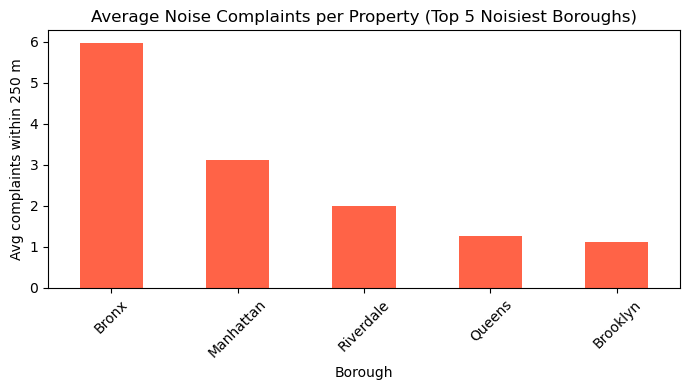

Correlation between noise and price (Top 5 noisiest boroughs): 0.048


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort boroughs by noise descending and keep only top 5
top5_noisy = (
    borough_stats
    .sort_values("avg_noise", ascending=False)
    .head(5)
)

# Plot bar chart
top5_noisy.plot(
    kind="bar",
    y="avg_noise",
    legend=False,
    figsize=(7,4),
    color="tomato",
    title="Average Noise Complaints per Property (Top 5 Noisiest Boroughs)"
)
plt.ylabel("Avg complaints within 250 m")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation (for these top 5)
corr = top5_noisy["avg_noise"].corr(top5_noisy["avg_price"])
print("Correlation between noise and price (Top 5 noisiest boroughs):", round(corr, 3))



In [138]:
# Get top 5 noisiest boroughs
top5_noisy = (
    borough_stats
    .sort_values("avg_noise", ascending=False)
    .head(5)
    [["avg_price", "listings", "avg_noise"]]
)

# Sort them by price descending
top5_noisy = top5_noisy.sort_values("avg_price", ascending=False)

# Format for readability
table = top5_noisy.copy()
table["avg_price"] = table["avg_price"].round(0).astype(int)
table["avg_noise"] = table["avg_noise"].round(2)
table["listings"] = table["listings"].astype(int)

# Rename columns for clarity
table = table.rename(columns={
    "avg_price": "Average Price (USD)",
    "listings": "Listings",
    "avg_noise": "Avg Noise Compl"
})

display(table)


,Average Price (USD),Listings,Avg Noise Compl
borough_clean,,,
Manhattan,4206402,1323,3.12
Brooklyn,1432150,1192,1.12
Queens,825780,1239,1.27
Bronx,763431,492,5.98
Riverdale,347000,4,2.00


In [ ]:
#negative correlation between noise and price, the more expensive sublocality (kings county) has fewer average noise complaints per property listings.
# That means luxury properties are relatively calm according to noise complaints within that sublocality

In [ ]:
#New York City is made up of five boroughs, each of which is also a county in New York State:
#Borough	County name
#Manhattan	New York County
#Brooklyn	Kings County
#Queens	Queens County
#The Bronx	Bronx County
#Staten Island	Richmond County